In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv


In [2]:
filepath = '/kaggle/input/amazon-fine-food-reviews/Reviews.csv'
data = pd.read_csv(filepath)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data = data[['Text', 'Score']]
data.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [4]:
data.shape

(568454, 2)

## Preprocessing

In [5]:
import re
from nltk.corpus import stopwords

def decontract(sentence):
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)

In [6]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

re_stop_words = re.compile(r"\b(" + "|".join(stopwords) + ")\\W", re.I)

In [7]:
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].apply(decontract)
data['Text'] = data['Text'].apply(cleanPunc)
data['Text'] = data['Text'].apply(keepAlpha)
data['Text'] = data['Text'].apply(removeStopWords)

In [8]:
#removes characters repeated 
data['Text'] = data['Text'].apply(lambda x: re.sub(r'(\w)(\1{2,})', r'\1',x)) 
data['token_size'] = data['Text'].apply(lambda x: len(x.split(' ')))

In [9]:
data.describe()

,Score,token_size
count,568454.000000,568454.000000
mean,4.183199,42.283054
std,1.310436,42.931296
min,1.000000,1.000000
25%,4.000000,18.000000
50%,5.000000,29.000000
75%,5.000000,51.000000
max,5.000000,2030.000000


In [10]:
# Avoid too much padding by filtering too long texts
data = data.loc[data['token_size'] < 60]

In [11]:
data.head()

,Text,Score,token_size
0,bought several vitality canned dog food produc...,5,24
1,product arrived labeled jumbo salted peanuts p...,1,19
2,confection around centuries light pillowy citr...,4,43
3,looking secret ingredient robitussin believe f...,2,18
4,great taffy great price wide assortment yummy ...,5,13


In [12]:
data = data.sample(n= 50000)

In [13]:
# Construct a vocabulary
class ConstructVocab():
    
    def __init__(self, sentences):
        self.sentences = sentences
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
        self.create_index()
        
    def create_index(self):
        for sent in self.sentences:
            self.vocab.update(sent.split(' '))
        
        #sort vacabulary
        self.vocab = sorted(self.vocab)
        
        #add a padding token with index 0
        self.word2idx['<pad>'] = 0
        
        #word to index mapping
        for index, word in enumerate(self.vocab):
            self.word2idx[word] = index + 1 # 0 is the pad
            
        #index to word mapping
        for word, index in self.word2idx.items():
            self.idx2word[index] = word

In [14]:
inputs = ConstructVocab(data['Text'].values.tolist())

In [15]:
inputs.vocab[:10]

['', 'a', 'aa', 'aafco', 'aafes', 'aahhed', 'aahing', 'aall', 'aand', 'aarp']

### Vectorizing input

In [16]:
input_tensor = [[inputs.word2idx[s] for s in es.split(' ')] for es in data['Text']]

In [17]:
input_tensor[:2]

[[13856,
  9955,
  32615,
  34987,
  5977,
  20170,
  18970,
  15306,
  17257,
  4024,
  4945,
  12953,
  13776,
  30113,
  15151,
  25891,
  16703],
 [4476,
  32515,
  11709,
  12188,
  13617,
  16897,
  1556,
  35295,
  14075,
  34661,
  34454,
  33753]]

### Padding data

In [18]:
def max_length(tensor):
    return max(len(t) for t in tensor)

In [19]:
max_length_input = max_length(input_tensor)
max_length_input

59

In [20]:
def pad_sequences(x, max_len):
    padded = np.zeros((max_len), dtype=np.int64)
    
    if len(x) > max_len: padded[:] = x[:max_len]
    else: padded[:len(x)] = x
        
    return padded

In [21]:
input_tensor = [pad_sequences(x, max_length_input) for x in input_tensor]

### Binarizing the target

In [22]:
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import itertools
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

rates = list(set(data.Score.unique()))
num_rates = len(rates)

mlb = preprocessing.MultiLabelBinarizer()
data_labels = [set(rat) & set(rates) for rat in data[['Score']].values]
bin_rates = mlb.fit_transform(data_labels)
target_tensor = np.array(bin_rates.tolist())

In [23]:
target_tensor[:2]

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [24]:
data[:2]

,Text,Score,token_size
370752,got drizzle top white chocolate mochas make ho...,5,17
457832,butter toffee favorite flavor gloria jean arom...,5,12


In [25]:
get_rating =  lambda x: np.argmax(x)+1

In [26]:
get_rating(target_tensor[0])

5

### Split data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(input_tensor, target_tensor, 
                                                    test_size=0.2, random_state=1000)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, 
                                                    test_size=0.5, random_state=1000)


### Data Loader

In [28]:
TRAIN_BUFFER_SIZE = len(X_train)
VAL_BUFFER_SIZE = len(X_val)
TEST_BUFFER_SIZE = len(X_test)
BATCH_SIZE = 64

TRAIN_N_BATCH = TRAIN_BUFFER_SIZE // BATCH_SIZE
VAL_N_BATCH = VAL_BUFFER_SIZE // BATCH_SIZE
TEST_N_BATCH = TEST_BUFFER_SIZE // BATCH_SIZE

In [29]:
from torch.utils.data import Dataset, DataLoader

In [30]:
# Use Dataset class to represent the dataset object
class MyData(Dataset):
    def __init__(self, X, y):
        self.data = X
        self.target = y
        self.length = [np.sum(1 - np.equal(x,0)) for x in X]
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        x_len = self.length[index]
        
        return x, y, x_len
    
    def __len__(self):
        return len(self.data)

In [31]:
import torch
from torch.autograd import Variable

train_dataset = MyData(X_train, y_train)
val_dataset = MyData(X_val, y_val)
test_dataset = MyData(X_test, y_test)

train_dataset = DataLoader(train_dataset, batch_size = BATCH_SIZE,
                          drop_last=True, shuffle=True)
val_dataset = DataLoader(val_dataset, batch_size = BATCH_SIZE,
                          drop_last=True, shuffle=True)
test_dataset = DataLoader(test_dataset, batch_size = BATCH_SIZE,
                          drop_last=True, shuffle=True)

In [32]:
train_dataset.dataset.target[:2]

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [33]:
embedding_dim = 256
units = 1024
vocab_inp_size = len(inputs.word2idx)
target_size = len(target_tensor[0])

## Keras

In [34]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf


Using TensorFlow backend.


In [35]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/device:GPU:0']

In [36]:
def create_model(X_train):

    model = Sequential()
    model.add(Embedding(vocab_inp_size, embedding_dim, input_length=max_length_input))
    model.add(Dropout(0.5))
    model.add(GRU(units))
    model.add(layers.Dense(5, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

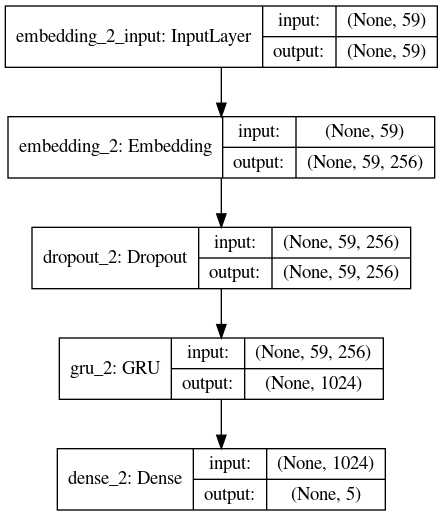

In [85]:
from keras.layers import Dense, Embedding, Dropout, GRU
from keras.models import Sequential
from keras import layers
from keras.utils.vis_utils import plot_model

model = create_model(pd.DataFrame(X_train))

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [38]:
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = time.process_time()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch,time.process_time() - self.timetaken))
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(*zip(*self.times))
        plt.show()

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 40000 samples, validate on 5000 samples
Epoch 1/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.3139 - accuracy: 0.8821 - val_loss: 0.2690 - val_accuracy: 0.8986
Epoch 2/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.2466 - accuracy: 0.9054 - val_loss: 0.2499 - val_accuracy: 0.9032
Epoch 3/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.2089 - accuracy: 0.9165 - val_loss: 0.2546 - val_accuracy: 0.9023
Epoch 4/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1764 - accuracy: 0.9287 - val_loss: 0.2719 - val_accuracy: 0.9014
Epoch 5/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1467 - accuracy: 0.9403 - val_loss: 0.2811 - val_accuracy: 0.8986
Epoch 6/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1218 - accuracy: 0.9514 - val_loss: 0.3195 - val_accuracy: 0.8939
Epoch 7/10
40000/40000 [==============================] - 55s 1ms/ste

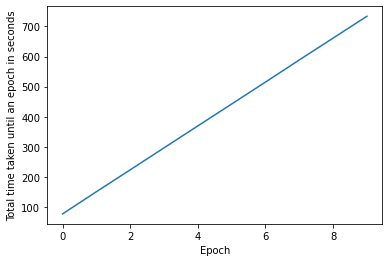

In [86]:
import matplotlib.pyplot as plt

timetaken = timecallback()
history = model.fit(pd.DataFrame(X_train), y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(pd.DataFrame(X_val), y_val),
                    batch_size=64,
                    callbacks = [timetaken])

In [87]:
time_epoch = []
time_epoch.append(timetaken.times[0][1])
for i in range(len(timetaken.times)-1):
    time_epoch.append(timetaken.times[i+1][1] - timetaken.times[i][1])
time_epoch

[77.07879529999991,
 73.74051551399998,
 72.69186529000012,
 73.05805261499995,
 72.96729886999992,
 72.74449938199996,
 72.91400821399998,
 73.4999409200002,
 72.64151397199998,
 72.61143759499987]

In [88]:
metrics = model.evaluate(pd.DataFrame(X_test), y_test)
print("Accuracy: {}".format(metrics[1]))

5000/5000 [==============================] - 2s 487us/step
Accuracy: 0.8864002823829651


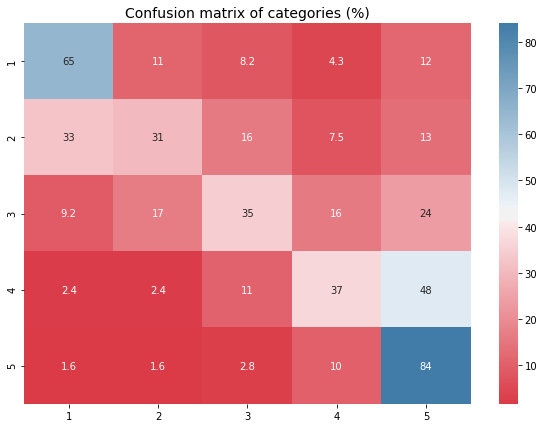

In [89]:
from sklearn import metrics
import seaborn as sns

predictions = model.predict_classes(pd.DataFrame(X_test)) 
labels = y_test.argmax(axis=1)
conf_matrix = metrics.confusion_matrix(predictions, labels)
conf_matrix = conf_matrix.astype(float)

for i in range(len(conf_matrix)):
    conf_matrix[i] = (conf_matrix[i]*100)/conf_matrix[i].sum()

df_cm = pd.DataFrame(conf_matrix, index = [i for i in "12345"],
                     columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)
plt.title("Confusion matrix of categories (%)", fontsize=14)
plt.show()

## PyTorch

In [45]:
#pip install pytorch-nlp
#pip install torchviz

In [46]:
import torch.nn as nn

class RateGRU(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_units, batch_sz, output_size):
        super(RateGRU, self).__init__()
        self.batch = batch_sz
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_units = hidden_units
        self.output_size = output_size
        
        #layers
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.dropout = nn.Dropout(p=0.5)
        self.gru = nn.GRU(self.embedding_dim, self.hidden_units)
        self.fc = nn.Linear(self.hidden_units, self.output_size)
        
    def initialize_hidden_state(self, device):
        return torch.zeros((1, self.batch, self.hidden_units)).to(device)
    
    def forward(self, x, lens, device):
        x = self.embedding(x)
        self.hidden = self.initialize_hidden_state(device)
        output, self.hidden = self.gru(x, self.hidden)
        out = output[-1, :, :]
        out = self.dropout(out)
        out = self.fc(out)
        
        return out, self.hidden

### Pretesting

In [47]:
def sort_batch(X, y, lengths):
    "sort the batches by length"
    
    lengths, indx = lengths.sort(dim=0, descending=True)
    X = X[indx]
    y = y[indx]
    
    return X.transpose(0, 1), y, lengths

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = RateGRU(vocab_inp_size, embedding_dim, units, BATCH_SIZE, target_size)
model.to(device)

it = iter(train_dataset)
x, y, x_len = next(it)

xs, ys, lens = sort_batch(x, y, x_len)

print('Input size: ', xs.size())

output, _ = model(xs.to(device), lens, device)
print(output.size())

Input size:  torch.Size([59, 64])
torch.Size([64, 5])


### Training

In [49]:
use_cuda = True if torch.cuda.is_available() else False
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = RateGRU(vocab_inp_size, embedding_dim, units, BATCH_SIZE, target_size)
model.to(device)

#loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

def loss_function(y, prediction):
    target = torch.max(y, 1)[1] 
    loss = criterion(prediction, target)
    
    return loss

def accuracy(target, logit):
    target = torch.max(target, 1)[1]
    corrects = (torch.max(logit, 1)[1].data == target).sum()
    accuracy = 100. * corrects / len(logit)
    
    return accuracy

In [50]:
from torchvision import models
print(model)

RateGRU(
  (embedding): Embedding(35938, 256)
  (dropout): Dropout(p=0.5, inplace=False)
  (gru): GRU(256, 1024)
  (fc): Linear(in_features=1024, out_features=5, bias=True)
)


In [51]:
EPOCHS = 10

for epoch in range(EPOCHS):
    
    start = time.time()
    total_loss = 0
    train_accuracy, val_accuracy = 0, 0
    
    for (batch, (inp, targ, lens)) in enumerate(train_dataset):
        loss = 0
        predictions, _ = model(inp.permute(1, 0).to(device), lens, device)
        
        loss += loss_function(targ.to(device), predictions)
        batch_loss = (loss / int(targ.shape[1]))
        total_loss += batch_loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_accuracy = accuracy(targ.to(device), predictions)
        train_accuracy += batch_accuracy
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Val Loss {:.4f}'.format(epoch + 1,
                                                              batch, 
                                                              batch_loss.cpu().detach().numpy()))
            
    for (batch, (inp, targ, lens)) in enumerate(val_dataset):
        
        predictions, _ = model(inp.permute(1, 0).to(device), lens, device)
        batch_accuracy = accuracy(targ.to(device), predictions)
        val_accuracy += batch_accuracy
        
    print('Epoch {} Loss {:.4f} -- Train Acc. {:.4f} -- Val Acc. {:.4f}'.format(epoch + 1,
                                                                                total_loss / TRAIN_N_BATCH,
                                                                                train_accuracy / TRAIN_N_BATCH,
                                                                                val_accuracy / TEST_N_BATCH))
        
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Val Loss 0.3409
Epoch 1 Batch 100 Val Loss 0.2240
Epoch 1 Batch 200 Val Loss 0.1920
Epoch 1 Batch 300 Val Loss 0.1595
Epoch 1 Batch 400 Val Loss 0.1930
Epoch 1 Batch 500 Val Loss 0.1244
Epoch 1 Batch 600 Val Loss 0.1635
Epoch 1 Loss 0.1816 -- Train Acc. 68.9550 -- Val Acc. 71.8950
Time taken for 1 epoch 15.668699502944946 sec

Epoch 2 Batch 0 Val Loss 0.1572
Epoch 2 Batch 100 Val Loss 0.1057
Epoch 2 Batch 200 Val Loss 0.1449
Epoch 2 Batch 300 Val Loss 0.1622
Epoch 2 Batch 400 Val Loss 0.1808
Epoch 2 Batch 500 Val Loss 0.1597
Epoch 2 Batch 600 Val Loss 0.1455
Epoch 2 Loss 0.1367 -- Train Acc. 74.9800 -- Val Acc. 74.0986
Time taken for 1 epoch 15.508939981460571 sec

Epoch 3 Batch 0 Val Loss 0.0880
Epoch 3 Batch 100 Val Loss 0.0936
Epoch 3 Batch 200 Val Loss 0.0836
Epoch 3 Batch 300 Val Loss 0.0920
Epoch 3 Batch 400 Val Loss 0.1107
Epoch 3 Batch 500 Val Loss 0.2186
Epoch 3 Batch 600 Val Loss 0.0869
Epoch 3 Loss 0.1046 -- Train Acc. 80.6925 -- Val Acc. 72.4159
Time taken f

In [52]:
x_raw = []
y_raw = []
all_predictions = []
test_accuracy = 0

for (batch, (inp, targ, lens)) in enumerate(test_dataset):
        
    predictions, _ = model(inp.permute(1, 0).to(device), lens, device)
    batch_accuracy = accuracy(targ.to(device), predictions)
    test_accuracy += batch_accuracy
    
    all_predictions = all_predictions + [i.item() for i in torch.max(predictions, 1)[1]]
    y_raw = y_raw + [y.item() for y in torch.max(targ, 1)[1]]
        
print('Test Accuracy {:.4f}'.format(test_accuracy.cpu().detach().numpy() / TEST_N_BATCH))

Test Accuracy 71.7548


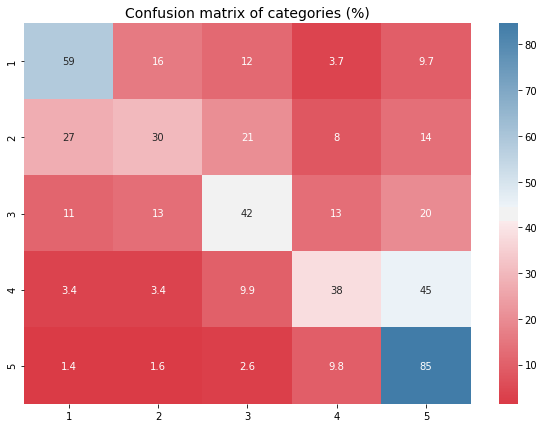

In [83]:
conf_matrix = metrics.confusion_matrix(all_predictions, y_raw)
conf_matrix = conf_matrix.astype(float)

for i in range(len(conf_matrix)):
    conf_matrix[i] = np.true_divide(conf_matrix[i],conf_matrix[i].sum())*100

df_cm = pd.DataFrame(conf_matrix, index = [i for i in "12345"],
                     columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)
plt.title("Confusion matrix of categories (%)", fontsize=14)
plt.show()

In [82]:
283/conf_matrix[i].sum()

array([[58.59213251, 15.94202899, 12.00828157,  3.72670807,  9.73084886],
       [27.42857143, 30.28571429, 20.57142857,  8.        , 13.71428571],
       [11.41732283, 13.38582677, 42.12598425, 13.38582677, 19.68503937],
       [ 3.39734121,  3.39734121,  9.89660266, 38.25701625, 45.05169867],
       [ 1.41052013,  1.64560682,  2.55656773,  9.75609756, 84.63120776]])